In [1]:
from jax.config import config
config.update("jax_enable_x64", True)
import jax
import jax.numpy as np
import tensorflow_probability.substrates.jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import tqdm.auto as tqdm
from PIL import Image, ImageOps
rng = jax.random.PRNGKey(2)

In [2]:
dataid=1

In [3]:
# get comparison to true posterior
# prior = uniform([0., 0.2], [2., 0.8])
# load marginals from Tom's code
size = 250
marginal = np.load('./marginal_field_%d_20x20_field.npy'%(dataid))
arr = marginal[~np.isnan(marginal)]
inds = np.argsort(arr)[::-1]
cdf = np.cumsum(arr[inds] / arr.sum())
levels = [arr[inds[np.argmin(np.abs(i - cdf))]] for i in [0.99, 0.95, 0.68, 0.]]


In [5]:
# pull in abc marginals
abc_marginal = np.load('abc_marginal_field_%d.npy'%(dataid))
distances = np.load('abc_distances.npy')

abc_ranges = np.load('./abc_ranges.npy')
abc_2d_marginal = np.load('./abc_2d_marginal_field_1.npy')
abc_levels = np.load('./abc_2d_marginal_field_levels_1.npy')

In [10]:
abc_levels

array([ 5.15118,  5.15123, 25.75615], dtype=float32)

<ipython-input-45-bf2ca4a5f90e>:10: UserWarning: The following kwargs were not used by contour: 'label'
  cs = plt.contourf(abc_ranges[column], abc_ranges[row], abc_2d_marginal.T, levels=abc_levels,
<ipython-input-45-bf2ca4a5f90e>:22: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(np.linspace(0., 2., size), np.linspace(0.2, 0.8, size), marginal, levels=levels, label='BHM')


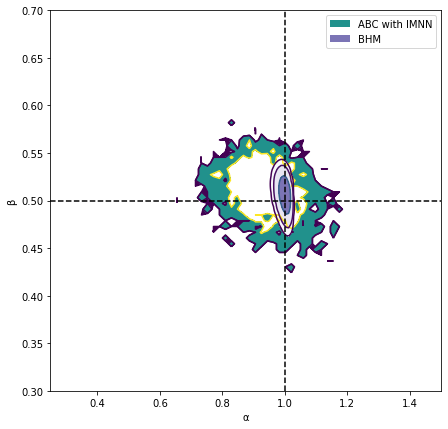

In [45]:
row=1
column=0

plt.figure(figsize=(7, 7))

# ABC estimate
plt.contour(abc_ranges[column], abc_ranges[row], abc_2d_marginal.T, levels=abc_levels,
                cmap='viridis')

cs = plt.contourf(abc_ranges[column], abc_ranges[row], abc_2d_marginal.T, levels=abc_levels,
                cmap='viridis', label='ABC with IMNN')

proxy2 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in cs.collections]

# BHM solution
cs = plt.contourf(np.linspace(0., 2., size), np.linspace(0.2, 0.8, size), marginal, levels=levels, cmap="Purples")

proxy1 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in cs.collections]

plt.contour(np.linspace(0., 2., size), np.linspace(0.2, 0.8, size), marginal, levels=levels, label='BHM')

# legend


proxies = [proxy2[1], proxy1[2]]


plt.legend(proxies, ["ABC with IMNN", "BHM"])


# plt.scatter(abc_marginal.T[0], abc_marginal.T[1], s=30, alpha=0.6,
#                 c=np.log(distances), cmap='viridis', edgecolors=None, linewidths=0, marker='.')


plt.xlabel("α")
plt.ylabel("β")
plt.ylim(0.3, 0.7)
plt.xlim(0.25, 1.5)
plt.axvline(1.0, linestyle="dashed", color="black")
plt.axhline(0.5, linestyle="dashed", color="black");

# plt.axvline(0.95, linestyle="dashed", color="gray")
# plt.axhline(0.55, linestyle="dashed", color="gray");
#plt.legend()
plt.savefig("/mnt/home/tmakinen/repositories/field-plots/IMNN_vs_BHM_field_%d.png"%(dataid), bbox_inches="tight", transparent=True)

In [32]:
proxy1

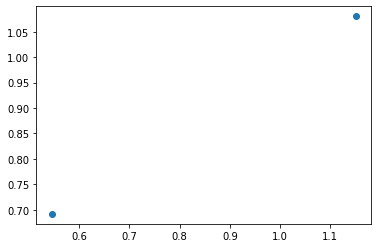

In [6]:
plt.scatter(abc_marginal[0], abc_marginal[1])

In [13]:
abc_marginal.shape

(1026, 2)